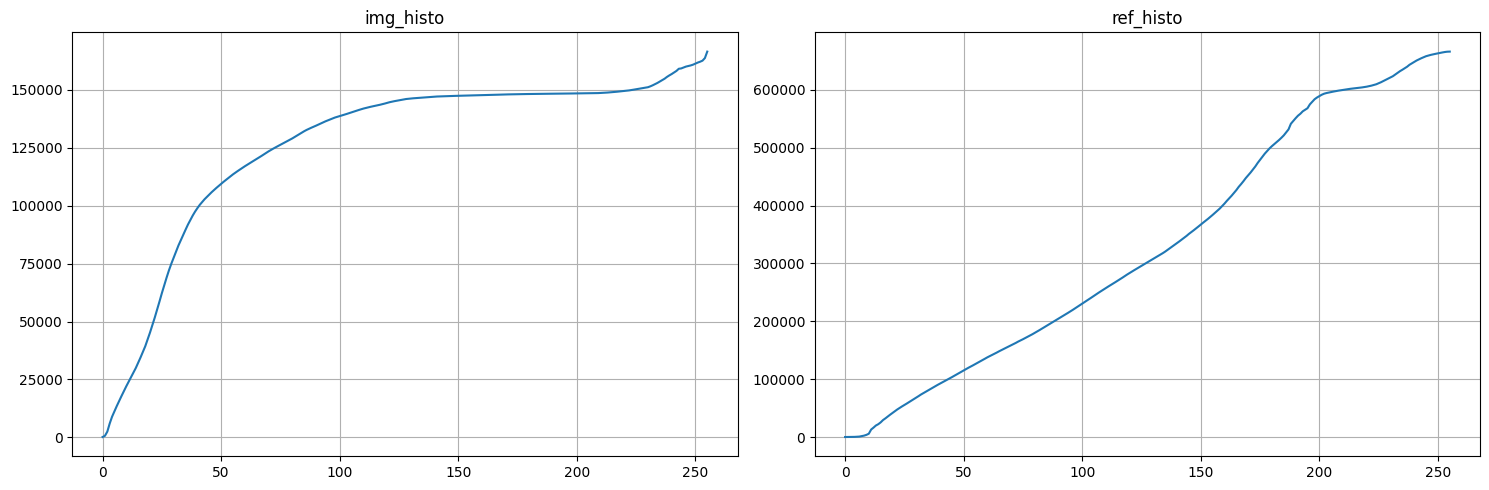

In [46]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

img = ski.io.imread("bild01.jpg")
ref= ski.io.imread("bild02.jpg")

img_gray = (ski.color.rgb2gray(img) * 255).astype(np.uint8)
ref_gray = (ski.color.rgb2gray(ref) * 255).astype(np.uint8)

img_histo, _ = np.histogram(img_gray, bins=256, range=(0, 256))
ref_histo, _ = np.histogram(ref_gray, bins=256, range=(0, 256))

cum_hist1 = np.cumsum(img_histo)
cum_hist2 = np.cumsum(ref_histo)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(cum_hist1)
axes[0].set_title("img_histo")
axes[1].plot(cum_hist2)
axes[1].set_title("ref_histo")
axes[0].grid()
axes[1].grid()
plt.tight_layout()
plt.show()


**Was ist eine homogene und was eine nicht-homogene Punktoperation?**  
- Homogene Punktoperationen behandeln jeden Pixel einzeln, unabhängig von anderen pixeln, aber alle Pixel werden auf die selbe weise verändert.  
- Nicht-Homogene Punktoperationen können die Pixel in ahbängigkeit von z.b. posiotion untershiedlich behandeln im selben Bild.  

**Was ist der Unterschied zwischen Punktoperationen und Filteroperationen?**  
- Filteroperationen nutzen mehr als nur einen Pixel um eine Anpassung vorzunehmen. Bei einem Blur werden beispielsweise mehrere pixel einer region betrachtet um eine unschärfe zu erzeugen.
- Bei Punktoperation ist lediglich der aktuelle betrachtete Pixel relevant


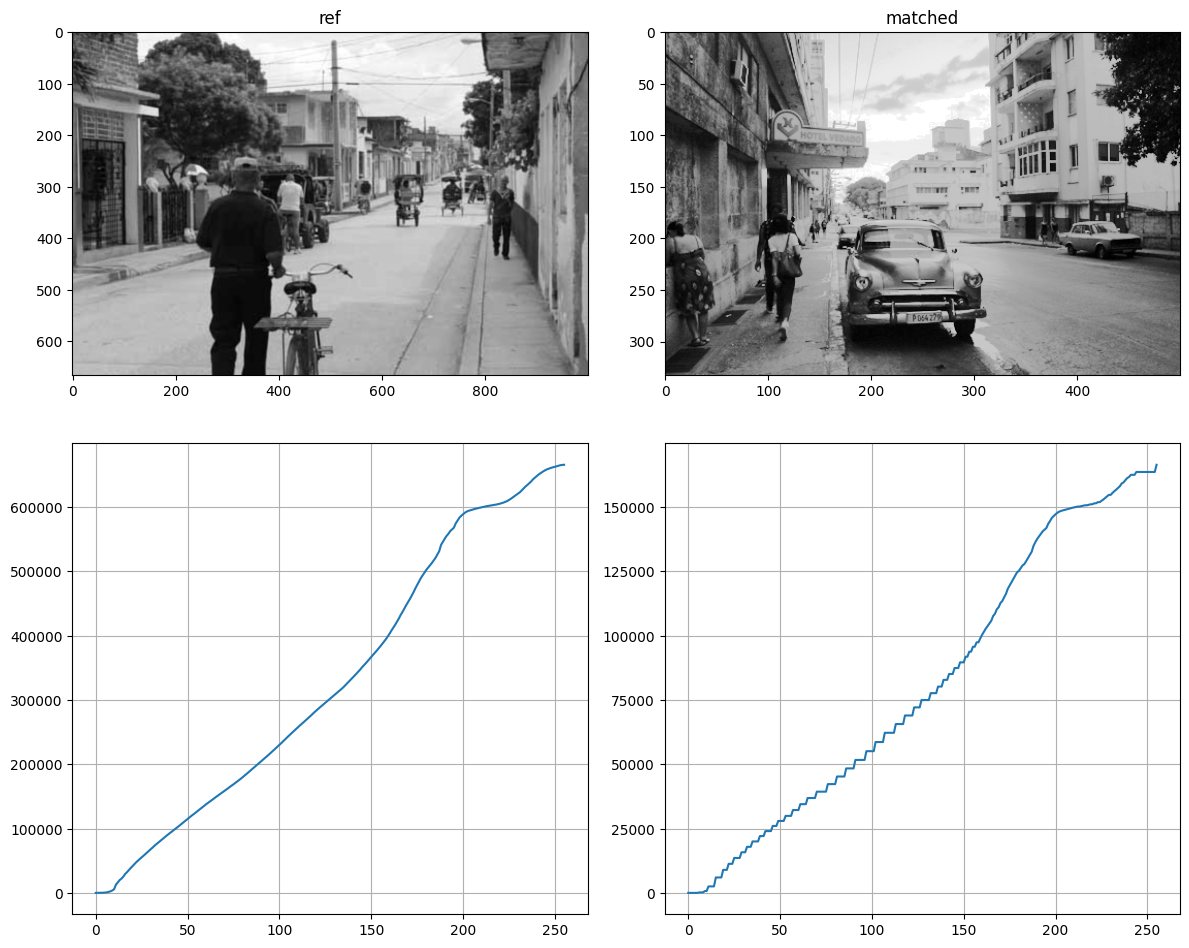

In [47]:
def match_Histo(img_histo, ref_histo):

    img_cum = np.cumsum(img_histo).astype(float)
    img_cum = img_cum / np.sum(img_histo)

    ref_cum = np.cumsum(ref_histo).astype(float)
    ref_cum = ref_cum / np.sum(ref_histo)
    
    LUT = np.zeros(256)
    
    for i in range(256):
        j = np.searchsorted(ref_cum, img_cum[i], side='right')
        LUT[i] = j
    
    return LUT


LUT = match_Histo(img_histo, ref_histo)
img_matched = LUT[img_gray]

hist_matched, _ = np.histogram(img_matched, bins=256, range=(0, 256))
cum_hist_matched = np.cumsum(hist_matched)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(ref_gray, cmap='gray')
axes[0, 0].set_title("ref")
axes[0, 1].imshow(img_matched, cmap='gray')
axes[0, 1].set_title("matched")
axes[1, 0].plot(cum_hist2)
axes[1, 0].grid(True)
axes[1, 1].plot(cum_hist_matched)
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()
